# Analysis of Tech Company Salaries

![techCompanies](tech_logos.png) 

This notebook takes a look into a dataset populated with information on tech employees working at various companies.  Our mission is to find and measure variables that may have an impact on the salary of an individual.

In [251]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [252]:
# Load the dataset
df = pd.read_csv('tech_companies_salary.csv')

In [253]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [254]:
# Number of null values in each column
df.isna().sum()

timestamp                      0
company                        5
level                        123
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          870
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22508
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

# Drop data with null values

Dropping the data of the gender, education, company, race, tag, and level columns, cleans up the data in order to look at the relationship of these variables on salaries.  These values cannot be replaced without potentially skewing the data.

In [255]:
# Remove rows with null values in subset columns
df = df.dropna(subset=['gender', 'Education', 'company', 'Race', 'tag', 'level'])
# Verify removal
print(df.isna().sum())

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
dtype: int64


## Updated Summary Statistics

In [256]:
df.size

623935

In [257]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,2.151500e+04,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000
mean,1.979508e+05,7.127167,2.706995,133894.538694,44974.392424,18401.301418,10177.354218,561.242436,59207.188891,0.421055,0.506577,0.042854,0.013944,0.015710,0.528887,0.355612,0.035417,0.030769,0.049361
std,1.331313e+05,5.848876,3.328438,57231.645682,72523.732291,24802.564405,7677.552448,315.744730,14561.633489,0.493740,0.499968,0.202532,0.117260,0.124354,0.499176,0.478710,0.184836,0.172696,0.216625
min,1.000000e+04,0.000000,0.000000,4000.000000,0.000000,0.000000,10.000000,0.000000,21208.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.190000e+05,3.000000,0.000000,100000.000000,0.000000,3000.000000,7322.000000,501.000000,47070.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.740000e+05,6.000000,2.000000,135000.000000,20000.000000,13000.000000,8198.000000,751.000000,59849.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.450000e+05,10.000000,4.000000,165000.000000,55000.000000,25000.000000,11521.000000,807.000000,71599.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,4.980000e+06,45.000000,40.000000,900000.000000,954000.000000,900000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Subsetting dataframe to remove redundant columns

In [258]:
df = df[['totalyearlycompensation', 'basesalary', 'bonus', 'company', 'cityid', 'location', 'level', 'title', 'tag', 'yearsofexperience',
        'yearsatcompany', 'stockgrantvalue', 'dmaid', 'rowNumber', 'Race', 'Education', 'gender']]

## Method to split the location column into city and state columns.

Locations with more than 2 strings delimited by a comma will be set to null values.  These locations correspond to locations outside of the United States.

Limiting our scope of the data to within the U.S. will increase the accuracy and usefulness of our model, as well as eliminate some outliers in the data.

In [259]:
def split_location(loc):
    location = loc.split(', ')  
    if len(location) == 2:
        city = location[0]
        state = location[1]
    else:
        city = None
        state = None
    return pd.Series([city, state])

df[['City', 'State']] = df['location'].apply(split_location)

### Verifying results of creating new columns and dropping data with null values in state column.

Dropping these results further eliminates international entries.

In [260]:
df.State.unique()

array(['CA', 'WA', 'TX', None, 'AZ', 'NY', 'IL', 'MA', 'NC', 'VA', 'CO',
       'FL', 'WI', 'DC', 'OR', 'MI', 'MN', 'MO', 'PA', 'UT', 'NJ', 'TN',
       'LA', 'GA', 'AR', 'IA', 'OH', 'MD', 'IN', 'MT', 'RI', 'DE', 'OK',
       'NV', 'CT', 'AL', 'SC', 'KS', 'KY', 'WV', 'MS', 'ID', 'NE', 'HI',
       'NH', 'NM', 'ND', 'VT', 'WY', 'ME'], dtype=object)

In [261]:
# Remove rows with null values in State column
df = df.dropna(subset='State')
# Verify removal
print(df.isna().sum())

totalyearlycompensation    0
basesalary                 0
bonus                      0
company                    0
cityid                     0
location                   0
level                      0
title                      0
tag                        0
yearsofexperience          0
yearsatcompany             0
stockgrantvalue            0
dmaid                      0
rowNumber                  0
Race                       0
Education                  0
gender                     0
City                       0
State                      0
dtype: int64


### Verification that columns contain unique and non-redundant values

In [262]:
df.Education.unique()

array(['PhD', "Bachelor's Degree", "Master's Degree", 'Some College',
       'Highschool'], dtype=object)

In [263]:
df.Race.unique()

array(['Asian', 'Two Or More', 'White', 'Hispanic', 'Black'], dtype=object)

In [264]:
df.title.unique()

array(['Software Engineer', 'Software Engineering Manager',
       'Hardware Engineer', 'Product Designer', 'Management Consultant',
       'Product Manager', 'Solution Architect', 'Sales',
       'Technical Program Manager', 'Data Scientist', 'Recruiter',
       'Mechanical Engineer', 'Business Analyst', 'Human Resources',
       'Marketing'], dtype=object)

### Formatting of the company category eliminates redundant values

In [265]:
df['company'] = df['company'].apply(lambda company: company.upper())

### Exporting dataframe for external use and backup purposes

In [266]:
#df.to_csv('updated_base_df.csv')

### Importing CSV loaded with stock market information to merge with original dataframe.

In [267]:
stocks_df = pd.read_csv('screener-stocks.csv')
stocks_df.head()

,Symbol,Company Name,Market Cap,Stock Price,% Change,Industry,PE Ratio,Ent. Value,MC Group,Sector,...,Oper. Margin,Pretax Margin,Profit Margin,R&D / Rev,Avg. Volume,Rel. Volume,RSI,Tax / Revenue,Rev Gr. This Q,Rev Gr. Next Q
0,FLWS,1-800-FLOWERS.COM,6.965698e+08,10.92,1.11%,Specialty Retail,NaN,7.024748e+08,Small-Cap,Consumer Discretionary,...,-2.89%,-3.39%,-3.24%,3.20%,420598.0,77.96%,59.81,-0.15%,-5.95%,-3.19%
1,VCXB,10X Capital Venture Acquisition Corp. III,1.421026e+08,10.77,NaN,Shell Companies,63.35,1.420773e+08,Micro-Cap,Financials,...,NaN,NaN,NaN,NaN,10038.0,0.12%,60.96,NaN,NaN,NaN
2,TXG,10x Genomics,4.316825e+09,36.89,1.77%,Health Information Services,NaN,4.023500e+09,Mid-Cap,Healthcare,...,-42.88%,-40.21%,-41.23%,43.69%,1403080.0,74.62%,34.24,1.02%,7.41%,8.17%
3,YI,"111, Inc.",8.735293e+07,1.01,-2.88%,Pharmaceutical Retailers,NaN,3.884045e+07,Micro-Cap,Healthcare,...,-2.30%,-2.58%,-2.63%,0.82%,81508.0,102.12%,27.80,0.00%,NaN,NaN
4,YQ,17 Education & Technology Group,3.065829e+07,2.97,NaN,Education & Training Services,NaN,-3.290321e+07,Nano-Cap,Consumer Staples,...,-196.68%,-178.90%,-182.37%,96.36%,18790.0,16.56%,54.54,NaN,NaN,NaN


### Creating a company column with reformatted company names creates a column that can merge the datasets.

Removal of the reference to ticker GOOGL, in order to merge data corresponding to ticker GOOG.

In [268]:
stocks_df['company'] = stocks_df['Company Name'].apply(lambda company: company.upper())
stocks_df.drop(stocks_df.loc[stocks_df['Symbol']=='GOOGL'].index, inplace=True)

### Reassignment of company names in original dataset to corresponding company names in stock dataset.

In [269]:
df.loc[ df['company'] == 'GOOGLE', 'company'] = 'ALPHABET'
df.loc[ df['company'] == 'AMAZON', 'company'] = 'AMAZON.COM'
df.loc[ df['company'] == 'FACEBOOK', 'company'] = 'META PLATFORMS'
df.loc[ df['company'] == 'PAYPAL', 'company'] = 'PAYPAL HOLDINGS'
df.loc[ df['company'] == 'HSBC', 'company'] = 'HSBC HOLDINGS'
df.loc[ df['company'] == 'APPLE INC.', 'company'] = 'APPLE'
df.loc[ df['company'] == '2U', 'company'] = '2U, INC.'
df.loc[ df['company'] == 'ABBOTT', 'company'] = 'ABBOTT LABORATORIES'
df.loc[ df['company'] == '8X8', 'company'] = '8X8, INC.'
df.loc[ df['company'] == 'ADP', 'company'] = 'Automatic Data Processing'.upper()
df.loc[ df['company'] == 'AFFIRM', 'company'] = 'AFFIRM HOLDINGS'
df.loc[ df['company'] == 'AMD', 'company'] = 'ADVANCED MICRO DEVICES'
df.loc[ df['company'] == 'INTEL CORPORATION', 'company'] = 'INTEL'
df.loc[ df['company'] == 'IBM', 'company'] = 'INTERNATIONAL BUSINESS MACHINES'
df.loc[ df['company'] == 'CAPITAL ONE', 'company'] = 'CAPITAL ONE FINANCIAL'
df.loc[ df['company'] == 'CISCO', 'company'] = 'CISCO SYSTEMS'
df.loc[ df['company'] == 'JPMORGAN CHASE', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'JP MORGAN CHASE', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'JP MORGAN', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'UBER', 'company'] = 'UBER TECHNOLOGIES'
df.loc[ df['company'] == 'GOLDMAN SACHS', 'company'] = 'THE GOLDMAN SACHS GROUP'
df.loc[ df['company'] == 'WALMART LABS', 'company'] = 'WALMART'
df.loc[ df['company'] == 'EBAY', 'company'] = 'EBAY INC.'
df.loc[ df['company'] == 'VISA', 'company'] = 'VISA INC.'
df.loc[ df['company'] == 'LYFT', 'company'] = 'LYFT, INC.'
df.loc[ df['company'] == 'SAP', 'company'] = 'SAP SE'
df.loc[ df['company'] == 'DELL', 'company'] = 'DELL TECHNOLOGIES'
df.loc[ df['company'] == 'BOEING', 'company'] = 'THE BOEING COMPANY'
df.loc[ df['company'] == 'GENERAL MOTORS', 'company'] = 'GENERAL MOTORS COMPANY'
df.loc[ df['company'] == 'T-MOBILE', 'company'] = 'T-MOBILE US'

### Initial merge of the data sets

In [270]:
agg_df = pd.merge(df, stocks_df, on="company", how="left")
print(agg_df['Symbol'].isna().sum())

5093


In [271]:
counts = agg_df['company'].value_counts()
print(counts.head(10))

company
AMAZON.COM                         2090
MICROSOFT                          1299
ALPHABET                           1104
META PLATFORMS                      867
APPLE                               569
ORACLE                              309
INTEL                               303
INTERNATIONAL BUSINESS MACHINES     277
CAPITAL ONE FINANCIAL               267
CISCO SYSTEMS                       262
Name: count, dtype: int64


### Eliminating Remaining Null Values

To eliminate the remaining null values of the symbol column, the entries were researched and a symbol was manually entered into the dataset. Private companies were assigned "Private", while ambiguous and government companies were left null.  The latter to be dropped.

This dataset was then merged on the "Symbol" column to fill in missing values and the dataset was saved as final_aggregated_df.csv.

Column names were updated in order to follow a uniform naming convention.

# Import of aggregated dataset

In [272]:
df = pd.read_csv('final_aggregated_df.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,total_yearly_compensation,base_salary,bonus,company,city_id,location,state,city,...,pretax_margin,profit_margin,research_development_over_revenue,average_volume,relative_volume,rsi,tax_over_revenue,revenue_growth_this_quarter,revenue_growth_next_quarter,gender
0,5928,0,400000,210000,45000,ALPHABET,7472,"Sunnyvale, CA",CA,Sunnyvale,...,27.89%,24.01%,14.78%,22956359.0,72.27%,64.81,3.88%,16.00%,14.35%,Male
1,10063,1,136000,124000,11000,MICROSOFT,11521,"Redmond, WA",WA,Redmond,...,44.47%,36.27%,12.09%,22842031.0,72.63%,56.25,8.20%,17.27%,17.13%,Male
2,5929,2,337000,177000,36000,ALPHABET,7413,"San Bruno, CA",CA,San Bruno,...,27.89%,24.01%,14.78%,22956359.0,72.27%,64.81,3.88%,16.00%,14.35%,Male
3,10064,3,222000,164000,20000,MICROSOFT,11527,"Seattle, WA",WA,Seattle,...,44.47%,36.27%,12.09%,22842031.0,72.63%,56.25,8.20%,17.27%,17.13%,Male
4,3787,4,187000,165000,0,BLEND,7419,"San Francisco, CA",CA,San Francisco,...,-113.87%,-118.15%,52.02%,1863929.0,43.24%,56.52,0.06%,-5.65%,-0.47%,Male


In [169]:
df.shape

(16903, 92)

# Subsetting and Cleaning Workable Dataset

In [170]:
print(df['symbol'].isna().sum())

126


In [171]:
# droppin entries with null values in the symbol column removes ambiguous and government companies
df = df.dropna(subset='symbol')

## Subset data into International, Private, and Public Companies

In [172]:
# Saved to potentially use later
international_companies = df.loc[df['symbol'] == 'INTERNATIONAL']

In [173]:
international_companies.shape

(288, 92)

In [177]:
# drop entries where symbol is international
public_companies = df.drop(df[df['symbol'] == 'INTERNATIONAL'].index)

In [178]:
# Saved to potentially use later
private_companies = df.loc[df['symbol'] == 'PRIVATE']

In [179]:
private_companies.shape

(2281, 92)

In [182]:
# drop entries where sympol is private
public_companies = public_companies.drop(public_companies[public_companies['symbol'] == 'PRIVATE'].index)

In [183]:
public_companies.shape

(14208, 92)

# Subsetting Columns for Analysis

In [184]:
public_companies = public_companies[['base_salary', 'total_yearly_compensation', 'title', 'years_of_experience', 
                                            'years_at_company', 'education', 'race', 'gender', 'mc_group', 'sector', 
                                            'industry', 'employees', 'revenue_per_employee', 'profit_per_employee',
                                            'cash_over_market_cap', 'debt_growth_year_over_year', 'rsi']]

In [185]:
public_companies.head()

,base_salary,total_yearly_compensation,title,years_of_experience,years_at_company,education,race,gender,mc_group,sector,industry,employees,revenue_per_employee,profit_per_employee,cash_over_market_cap,debt_growth_year_over_year,rsi
0,210000,400000,Software Engineer,5,5,PhD,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,1685450.0,404620.0,4.54%,-5.47%,64.81
1,124000,136000,Software Engineer,3,2,Bachelor's Degree,Two Or More,Male,Mega-Cap,Technology,Software - Infrastructure,221000.0,1029787.0,373489.0,-0.23%,47.01%,56.25
2,177000,337000,Software Engineer,6,6,Bachelor's Degree,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,1685450.0,404620.0,4.54%,-5.47%,64.81
3,164000,222000,Software Engineer,4,4,Master's Degree,Asian,Male,Mega-Cap,Technology,Software - Infrastructure,221000.0,1029787.0,373489.0,-0.23%,47.01%,56.25
4,165000,187000,Software Engineer,5,0,Bachelor's Degree,White,Male,Small-Cap,Technology,Software - Application,881.0,178032.0,-210352.0,-1.06%,-36.23%,56.52


In [186]:
public_companies.isna().sum()

base_salary                     0
total_yearly_compensation       0
title                           0
years_of_experience             0
years_at_company                0
education                       0
race                            0
gender                          0
mc_group                        0
sector                          0
industry                        0
employees                      11
revenue_per_employee           32
profit_per_employee            22
cash_over_market_cap            0
debt_growth_year_over_year    144
rsi                             8
dtype: int64

# Data Normalization

Reducing the scale of the numbers in the data will aid in finding a relationship between variables.

In [187]:
# New columns are created corresponding to original columns with values divided by 100k
public_companies['total_yearly_compensation_norm'] = public_companies['total_yearly_compensation'].div(100000).round(8)
public_companies['base_salary_norm'] = public_companies['base_salary'].div(100000).round(8)
public_companies['employees_norm'] = public_companies['employees'].div(100000).round(8)
public_companies['revenue_per_employee_norm'] = public_companies['revenue_per_employee'].div(100000).round(8)
public_companies['profit_per_employee_norm'] = public_companies['profit_per_employee'].div(100000).round(8)

In [188]:
public_companies.loc[:,['total_yearly_compensation','total_yearly_compensation_norm',
                        'base_salary', 'base_salary_norm', 'employees', 'employees_norm',
                        'revenue_per_employee', 'revenue_per_employee_norm',
                        'profit_per_employee', 'profit_per_employee_norm']].head()

,total_yearly_compensation,total_yearly_compensation_norm,base_salary,base_salary_norm,employees,employees_norm,revenue_per_employee,revenue_per_employee_norm,profit_per_employee,profit_per_employee_norm
0,400000,4.00,210000,2.10,182381.0,1.82381,1685450.0,16.85450,404620.0,4.04620
1,136000,1.36,124000,1.24,221000.0,2.21000,1029787.0,10.29787,373489.0,3.73489
2,337000,3.37,177000,1.77,182381.0,1.82381,1685450.0,16.85450,404620.0,4.04620
3,222000,2.22,164000,1.64,221000.0,2.21000,1029787.0,10.29787,373489.0,3.73489
4,187000,1.87,165000,1.65,881.0,0.00881,178032.0,1.78032,-210352.0,-2.10352


In [189]:
# columns with percentages as entries are reformatted and divided by 100
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year'].str.rstrip('%')
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year_norm'].astype(float)
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year_norm'].div(100).round(8)

public_companies['cash_over_market_cap_norm'] = public_companies['cash_over_market_cap'].str.rstrip('%')
public_companies['cash_over_market_cap_norm'] = public_companies['cash_over_market_cap_norm'].astype(float)
public_companies['cash_over_market_cap_norm'] = public_companies['cash_over_market_cap_norm'].div(100).round(8)

In [193]:
public_companies.loc[:,['debt_growth_year_over_year', 'debt_growth_year_over_year_norm', 'cash_over_market_cap', 'cash_over_market_cap_norm']].head()

,debt_growth_year_over_year,debt_growth_year_over_year_norm,cash_over_market_cap,cash_over_market_cap_norm
0,-5.47%,-0.0547,4.54%,0.0454
1,47.01%,0.4701,-0.23%,-0.0023
2,-5.47%,-0.0547,4.54%,0.0454
3,47.01%,0.4701,-0.23%,-0.0023
4,-36.23%,-0.3623,-1.06%,-0.0106


# Numerical Data: Summary Statistics and Visualizations

In [194]:
# Method to process and remove outliers from dataset
def processOutliers(dataframe, column):
    lowerThreshold = dataframe[column].quantile(.005)
    upperThreshold = dataframe[column].quantile(.995)

    dataframe = dataframe[(public_companies[column] < upperThreshold) & (dataframe[column] > lowerThreshold)]

    return dataframe

## Individual Data
### Normalized Total Yearly Compensation Column

In [195]:
public_companies['total_yearly_compensation_norm'].describe()

count    14208.000000
mean         2.280078
std          1.364616
min          0.160000
25%          1.500000
50%          1.980000
75%          2.700000
max         49.800000
Name: total_yearly_compensation_norm, dtype: float64

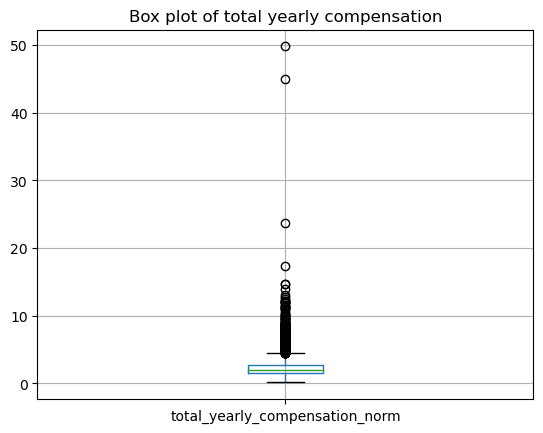

In [196]:
public_companies.boxplot('total_yearly_compensation_norm')
plt.title('Box plot of total yearly compensation')
plt.show()

In [197]:
public_companies = processOutliers(public_companies, 'total_yearly_compensation_norm')

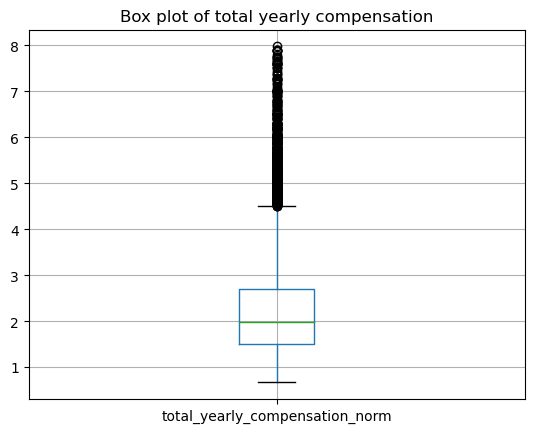

In [198]:
public_companies.boxplot('total_yearly_compensation_norm')
plt.title('Box plot of total yearly compensation')
plt.show()

### Normalized Base Salary Column

In [199]:
public_companies['base_salary_norm'].describe()

count    14054.000000
mean         1.502673
std          0.469442
min          0.100000
25%          1.200000
50%          1.460000
75%          1.700000
max          7.600000
Name: base_salary_norm, dtype: float64

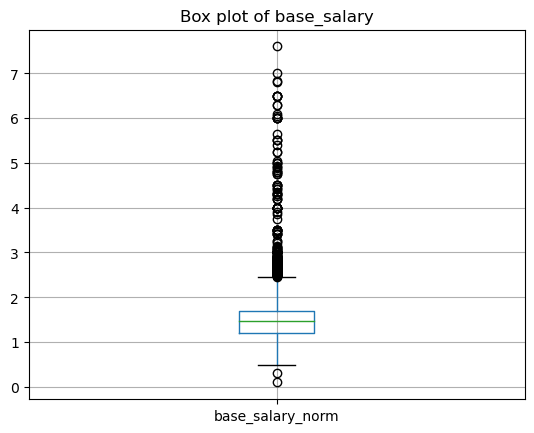

In [200]:
public_companies.boxplot('base_salary_norm')
plt.title('Box plot of base_salary')
plt.show()

In [201]:
public_companies = processOutliers(public_companies, 'base_salary_norm')

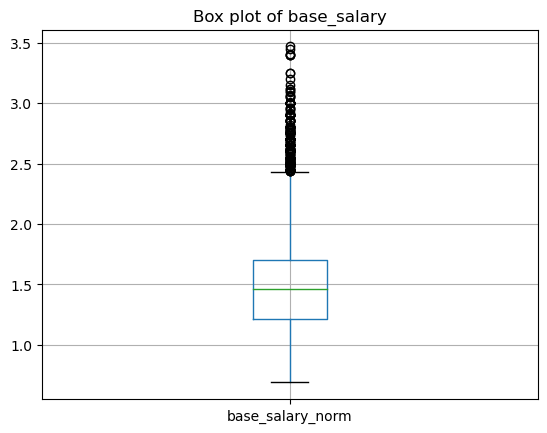

In [202]:
public_companies.boxplot('base_salary_norm')
plt.title('Box plot of base_salary')
plt.show()

### Years of Experience Column

In [203]:
public_companies['years_of_experience'].describe()

count    13909.000000
mean         7.326983
std          6.104373
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         45.000000
Name: years_of_experience, dtype: float64

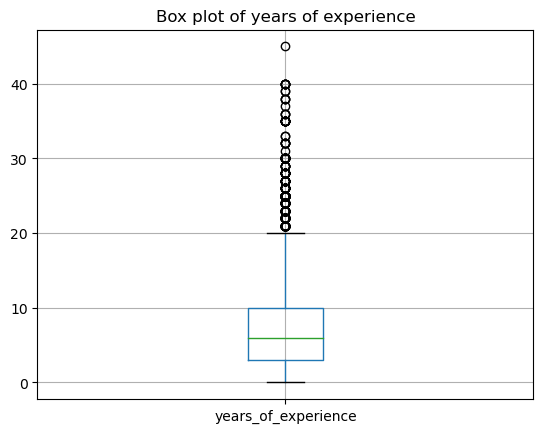

In [204]:
public_companies.boxplot('years_of_experience')
plt.title('Box plot of years of experience')
plt.show()

In [205]:
public_companies = processOutliers(public_companies, 'years_of_experience')

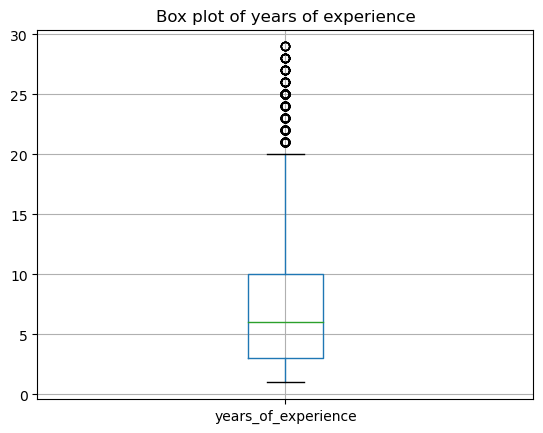

In [206]:
public_companies.boxplot('years_of_experience')
plt.title('Box plot of years of experience')
plt.show()

### Years at Company Column

In [207]:
public_companies['years_at_company'].describe()

count    12910.000000
mean         3.019597
std          3.510418
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         28.000000
Name: years_at_company, dtype: float64

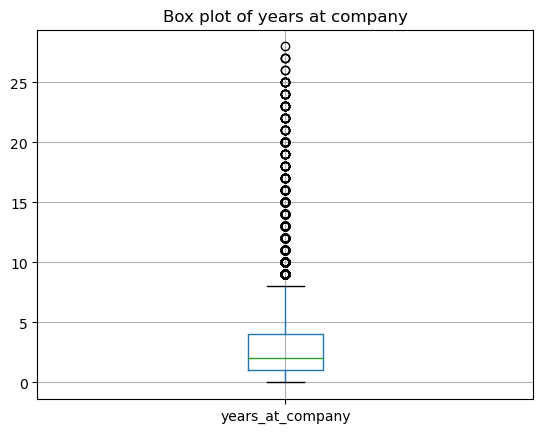

In [208]:
public_companies.boxplot('years_at_company')
plt.title('Box plot of years at company')
plt.show()

In [209]:
public_companies = processOutliers(public_companies, 'years_at_company')

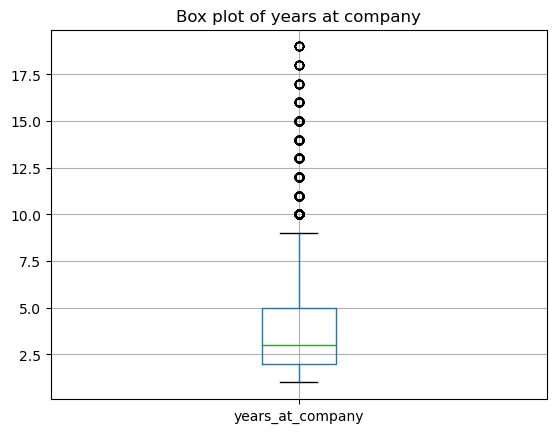

In [210]:
public_companies.boxplot('years_at_company')
plt.title('Box plot of years at company')
plt.show()

## Company Data

### Normalized Number of Employees Column

In [211]:
public_companies['employees_norm'].describe()

count    9917.000000
mean        3.399728
std         5.349627
min         0.000810
25%         0.304000
50%         1.248000
75%         2.210000
max        21.000000
Name: employees_norm, dtype: float64

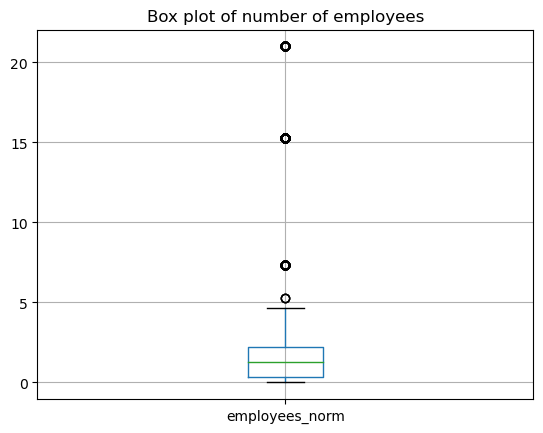

In [212]:
public_companies.boxplot('employees_norm')
plt.title('Box plot of number of employees')
plt.show()

In [213]:
public_companies = processOutliers(public_companies, 'employees_norm')

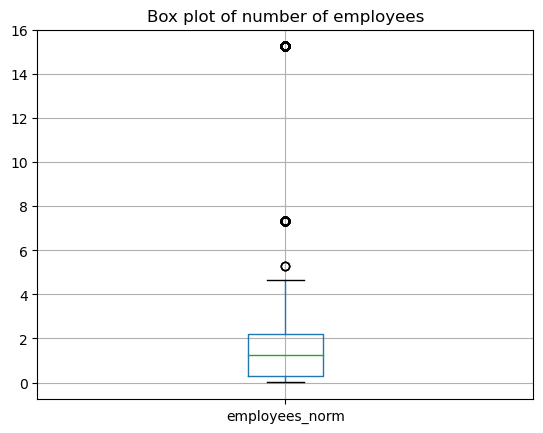

In [214]:
public_companies.boxplot('employees_norm')
plt.title('Box plot of number of employees')
plt.show()

### Normalized Revenue per Employee Column

In [215]:
public_companies['revenue_per_employee_norm'].describe()

count    9739.000000
mean        9.251272
std         9.279961
min         0.346780
25%         3.769080
50%         6.741220
75%        11.580210
max       128.519690
Name: revenue_per_employee_norm, dtype: float64

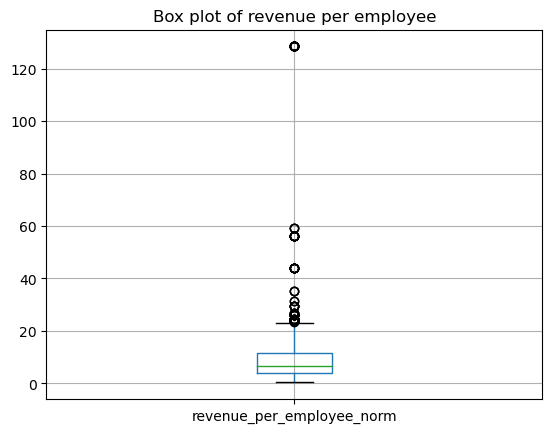

In [216]:
public_companies.boxplot('revenue_per_employee_norm')
plt.title('Box plot of revenue per employee')
plt.show()

In [217]:
public_companies = processOutliers(public_companies, 'revenue_per_employee_norm')

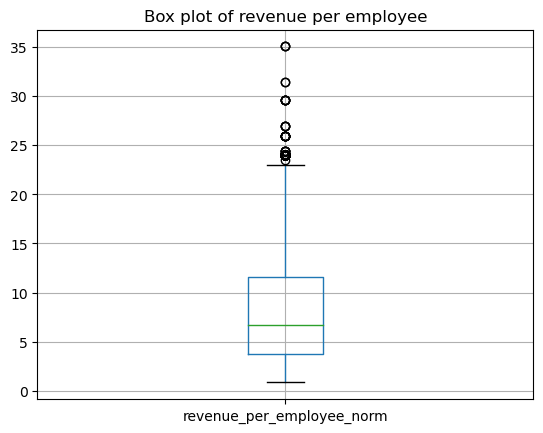

In [218]:
public_companies.boxplot('revenue_per_employee_norm')
plt.title('Box plot of revenue per employee')
plt.show()

### Normalized Profit per Employee Column

In [219]:
public_companies['profit_per_employee_norm'].describe()

count    9544.000000
mean        1.851787
std         2.300348
min       -10.508260
25%         0.199510
50%         0.780600
75%         3.734890
max        10.054050
Name: profit_per_employee_norm, dtype: float64

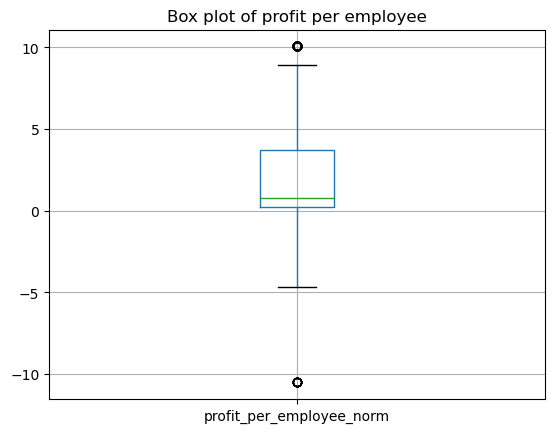

In [220]:
public_companies.boxplot('profit_per_employee_norm')
plt.title('Box plot of profit per employee')
plt.show()

In [221]:
public_companies = processOutliers(public_companies, 'profit_per_employee_norm')

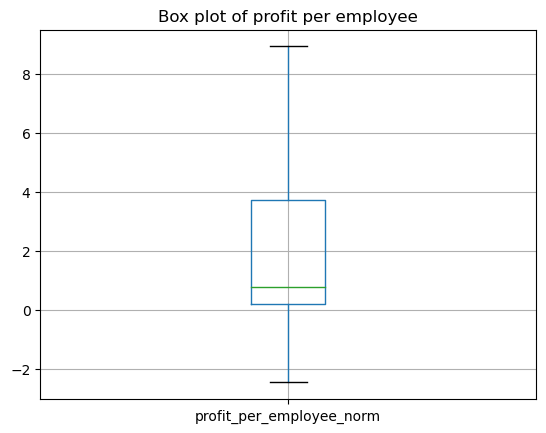

In [222]:
public_companies.boxplot('profit_per_employee_norm')
plt.title('Box plot of profit per employee')
plt.show()

### Normalized Debt Growth (YoY) column

In [223]:
public_companies['debt_growth_year_over_year_norm'].describe()

count    9354.000000
mean        0.093486
std         0.297144
min        -0.915000
25%        -0.041700
50%        -0.016950
75%         0.187000
max        14.550800
Name: debt_growth_year_over_year_norm, dtype: float64

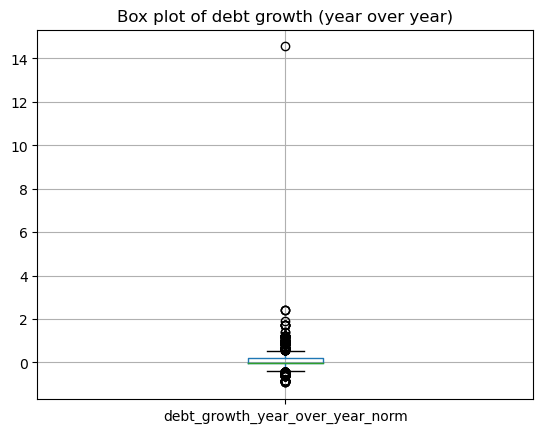

In [224]:
public_companies.boxplot('debt_growth_year_over_year_norm')
plt.title('Box plot of debt growth (year over year)')
plt.show()

In [225]:
public_companies = processOutliers(public_companies, 'debt_growth_year_over_year_norm')

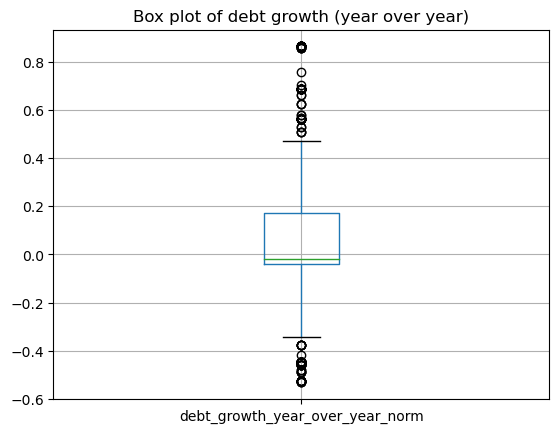

In [226]:
public_companies.boxplot('debt_growth_year_over_year_norm')
plt.title('Box plot of debt growth (year over year)')
plt.show()

### Normalized Cash Over Market Cap Column

In [227]:
public_companies['cash_over_market_cap_norm'].describe()

count    9098.000000
mean       -0.186206
std         1.274723
min       -42.670200
25%        -0.122400
50%        -0.018300
75%         0.022300
max         2.920500
Name: cash_over_market_cap_norm, dtype: float64

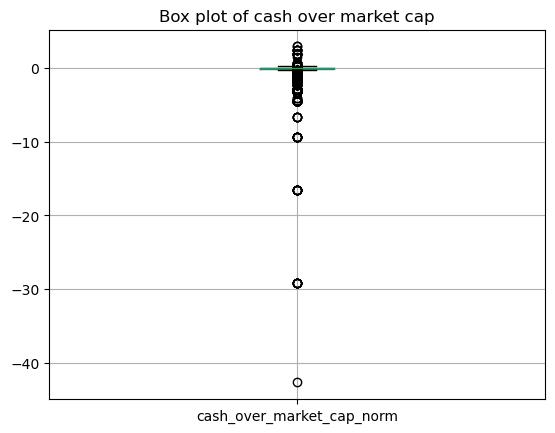

In [228]:
public_companies.boxplot('cash_over_market_cap_norm')
plt.title('Box plot of cash over market cap')
plt.show()

In [229]:
public_companies = processOutliers(public_companies, 'cash_over_market_cap_norm')

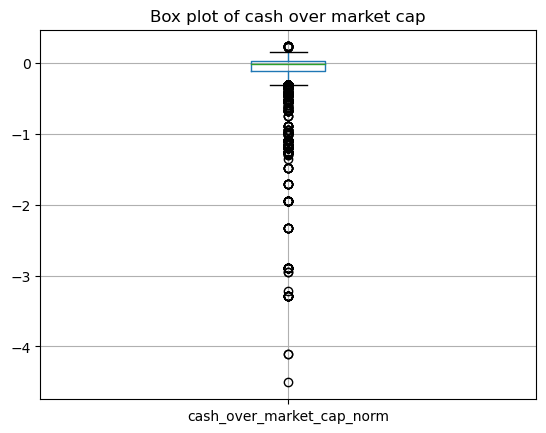

In [230]:
public_companies.boxplot('cash_over_market_cap_norm')
plt.title('Box plot of cash over market cap')
plt.show()

### RSI

In [231]:
public_companies['rsi'].describe()

count    8923.000000
mean       57.376971
std         8.400591
min        22.750000
25%        52.390000
50%        56.250000
75%        62.720000
max        81.660000
Name: rsi, dtype: float64

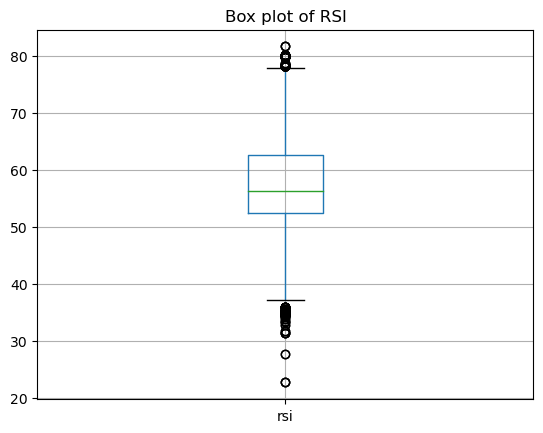

In [232]:
public_companies.boxplot('rsi')
plt.title('Box plot of RSI')
plt.show()

In [233]:
public_companies = processOutliers(public_companies, 'rsi')

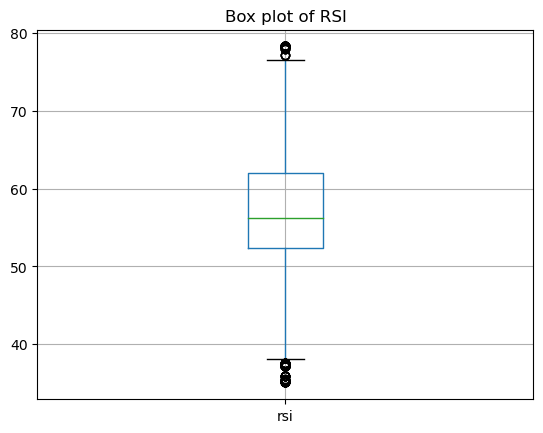

In [234]:
public_companies.boxplot('rsi')
plt.title('Box plot of RSI')
plt.show()

In [235]:
public_companies.isna().sum()

base_salary                        0
total_yearly_compensation          0
title                              0
years_of_experience                0
years_at_company                   0
education                          0
race                               0
gender                             0
mc_group                           0
sector                             0
industry                           0
employees                          0
revenue_per_employee               0
profit_per_employee                0
cash_over_market_cap               0
debt_growth_year_over_year         0
rsi                                0
total_yearly_compensation_norm     0
base_salary_norm                   0
employees_norm                     0
revenue_per_employee_norm          0
profit_per_employee_norm           0
debt_growth_year_over_year_norm    0
cash_over_market_cap_norm          0
dtype: int64

In [236]:
public_companies.shape

(8819, 24)

In [237]:
public_companies.describe()

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,employees,revenue_per_employee,profit_per_employee,rsi,total_yearly_compensation_norm,base_salary_norm,employees_norm,revenue_per_employee_norm,profit_per_employee_norm,debt_growth_year_over_year_norm,cash_over_market_cap_norm
count,8819.000000,8819.000000,8819.000000,8819.000000,8.819000e+03,8.819000e+03,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,150042.068262,227385.644631,8.116453,3.747364,3.428252e+05,8.753423e+05,183033.332918,57.364468,2.273856,1.500421,3.428252,8.753423,1.830333,0.076129,-0.083401
std,38512.400163,110895.372126,5.722562,3.116348,5.206619e+05,6.244176e+05,209569.522943,8.065602,1.108954,0.385124,5.206619,6.244176,2.095695,0.208330,0.272475
min,69000.000000,69000.000000,1.000000,1.000000,9.750000e+02,8.825100e+04,-225257.000000,35.090000,0.690000,0.690000,0.009750,0.882510,-2.252570,-0.530700,-4.506800
25%,125000.000000,150000.000000,4.000000,2.000000,5.198700e+04,3.769080e+05,19951.000000,52.390000,1.500000,1.250000,0.519870,3.769080,0.199510,-0.041700,-0.098700
50%,148000.000000,201000.000000,7.000000,3.000000,1.610000e+05,6.536130e+05,78333.000000,56.250000,2.010000,1.480000,1.610000,6.536130,0.783330,-0.018900,-0.016900
75%,171000.000000,276000.000000,11.000000,5.000000,2.210000e+05,1.094522e+06,373489.000000,62.050000,2.760000,1.710000,2.210000,10.945220,3.734890,0.171600,0.022300
max,347000.000000,790000.000000,29.000000,19.000000,1.525000e+06,3.504541e+06,893576.000000,78.260000,7.900000,3.470000,15.250000,35.045410,8.935760,0.863000,0.234500


# Categorical Data
## Individual Data

### Education Level

In [238]:
public_companies['education'].describe()

count                  8819
unique                    5
top       Bachelor's Degree
freq                   4154
Name: education, dtype: object

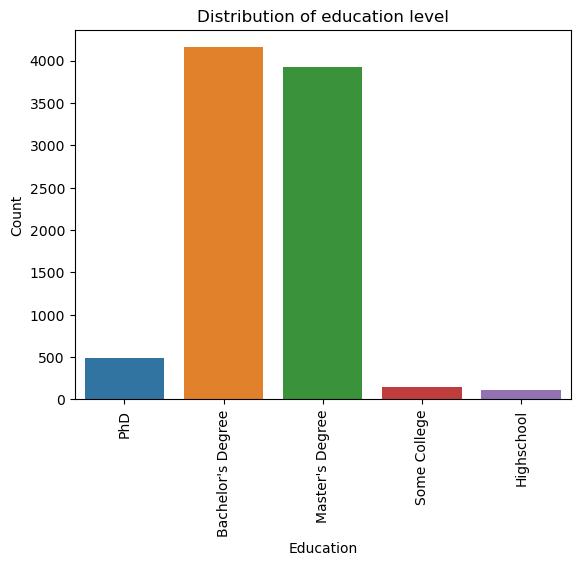

In [239]:
sns.countplot(x='education', data=public_companies)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of education level')
plt.xticks(rotation=90)
plt.show()

### Race

In [240]:
public_companies['race'].describe()

count      8819
unique        5
top       Asian
freq       4411
Name: race, dtype: object

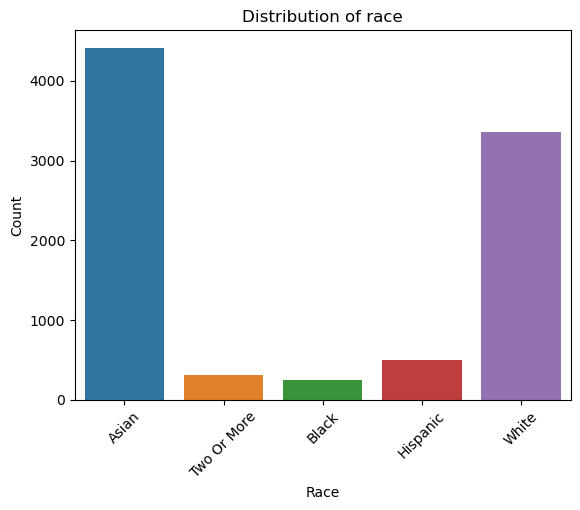

In [241]:
sns.countplot(x='race', data=public_companies)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of race')
plt.xticks(rotation=45)
plt.show()

### Sex

In [242]:
public_companies['gender'].describe()

count     8819
unique       3
top       Male
freq      6964
Name: gender, dtype: object

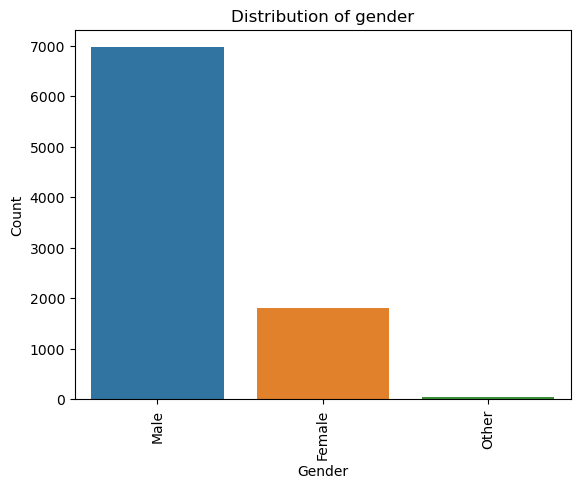

In [243]:
sns.countplot(x='gender', data=public_companies)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of gender')
plt.xticks(rotation=90)
plt.show()

## Company Data
### Market Cap Group

In [244]:
public_companies['mc_group'].describe()

count         8819
unique           5
top       Mega-Cap
freq          5326
Name: mc_group, dtype: object

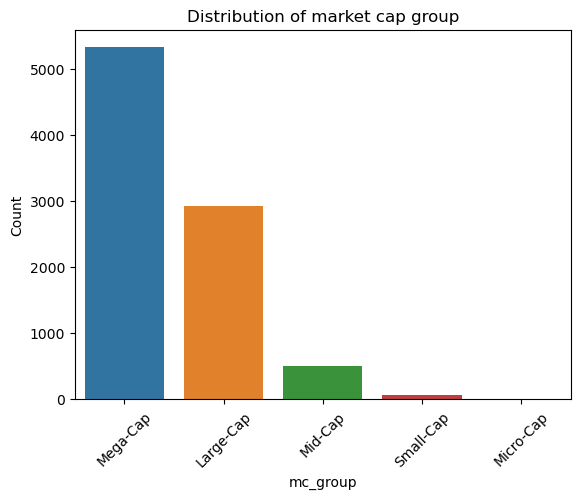

In [245]:
sns.countplot(x='mc_group', data=public_companies)
plt.xlabel('mc_group')
plt.ylabel('Count')
plt.title('Distribution of market cap group')
plt.xticks(rotation=45)
plt.show()

### Sector

In [246]:
public_companies['sector'].describe()

count           8819
unique            11
top       Technology
freq            3926
Name: sector, dtype: object

In [247]:
public_companies.groupby('sector')['base_salary'].count()


sector
Communication Services    1680
Consumer Discretionary    1898
Consumer Staples            47
Energy                       7
Financials                 783
Healthcare                 134
Industrials                319
Materials                    4
Real Estate                 15
Technology                3926
Utilities                    6
Name: base_salary, dtype: int64

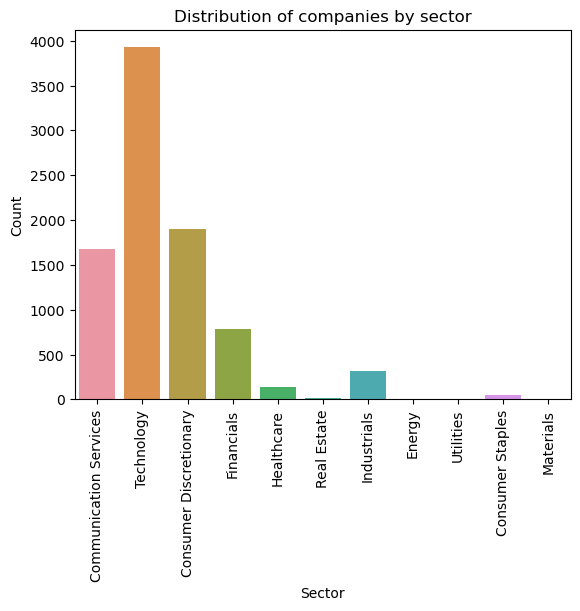

In [248]:
sns.countplot(x='sector', data=public_companies)
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Distribution of companies by sector')
plt.xticks(rotation=90)
plt.show()